In [48]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

### Importação e tratamento auxiliar dos dados

In [49]:
data = pd.read_csv('creditcard_reduced.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,62080.0,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,...,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,180.00,1
2,149096.0,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
3,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
4,102622.0,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,...,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,346.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,29135.0,1.148470,-0.226385,-1.378984,-0.501250,2.115918,3.156576,-0.191150,0.725852,-0.240172,...,-0.497682,-1.855851,0.146490,0.960612,0.220649,-0.123232,-0.058349,0.027293,94.31,0
10488,161456.0,0.098372,0.881126,-0.412761,-0.501913,0.817211,-0.925919,0.864430,-0.038913,0.142891,...,-0.346648,-0.932954,0.134695,0.594512,-0.465915,0.113468,0.211053,0.083482,6.45,0
10489,20259.0,-0.230903,0.188957,1.950648,-1.682032,-0.491241,0.442542,-0.611728,-0.566704,2.466857,...,0.615393,-0.317370,-0.344081,-0.355076,1.492861,-0.662246,0.117670,0.129243,11.85,0
10490,32140.0,-0.818437,0.592785,0.468012,-0.279240,1.401790,-1.316362,0.647986,-0.015513,-0.784337,...,0.056923,-0.071114,-0.134238,-0.112990,-0.167753,0.148682,0.057840,0.164770,0.76,0


In [50]:
data = data.drop(['Time'], axis=1)
print(data['Class'].value_counts())
# Eu possuo 100 valores de classe 0 e 492 valores de classe 1. Deixando os valores iguals, 492 em cada classe
data = data.sample(frac=1)
fraude = data.loc[data['Class'] == 1]
nao_fraude = data.loc[data['Class'] == 0][:492]
normal_distributed_data = pd.concat([fraude, nao_fraude])
print(normal_distributed_data['Class'].value_counts())

0    10000
1      492
Name: Class, dtype: int64
1    492
0    492
Name: Class, dtype: int64


In [51]:
X = np.array(normal_distributed_data.drop(['Class'], axis = 1))
Y = np.array(normal_distributed_data['Class'])

### Separando em treino, validação e teste

In [52]:
RANDOM_STATE = 3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=RANDOM_STATE,test_size=0.2)

# Separando os dados de treino em treino e validação
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, random_state=RANDOM_STATE,test_size=0.2)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (629, 29)
Y_train: (629,)
X_val: (158, 29)
Y_val: (158,)


### Criando a arvore

Ein: 0.0000
Eout: 0.1371
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        94
           1       0.84      0.91      0.87       103

    accuracy                           0.86       197
   macro avg       0.87      0.86      0.86       197
weighted avg       0.87      0.86      0.86       197



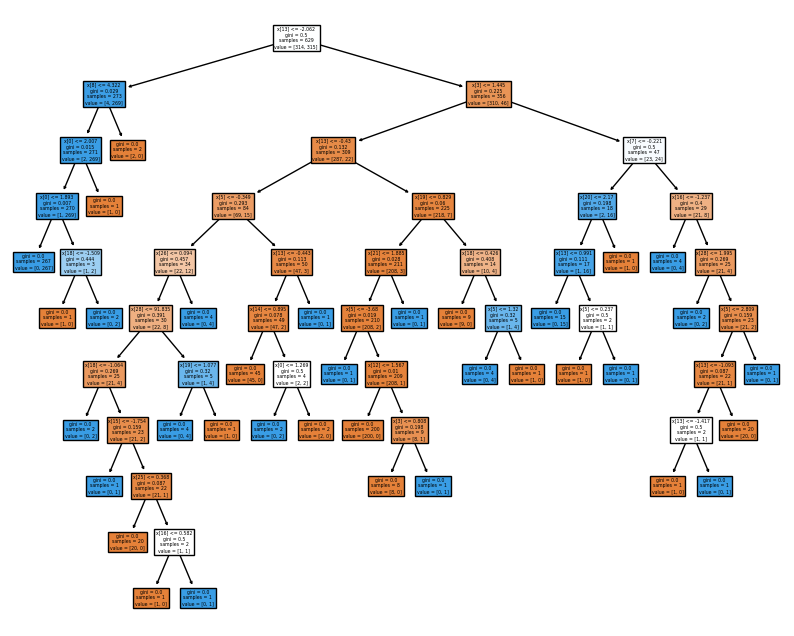

In [53]:
# Create the decision tree model
model = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Fit the model to the training data
clf = model.fit(X_train, Y_train)

# Obtendo a acuracia usando accuracy_score()
print('Ein: %0.4f' % (1 - accuracy_score(Y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(Y_test, clf.predict(X_test))))
print(classification_report(Y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 8))
plot_tree(model, filled=True)
plt.show()


              precision    recall  f1-score   support

           0       0.89      0.81      0.85        94
           1       0.84      0.91      0.87       103

    accuracy                           0.86       197
   macro avg       0.87      0.86      0.86       197
weighted avg       0.87      0.86      0.86       197



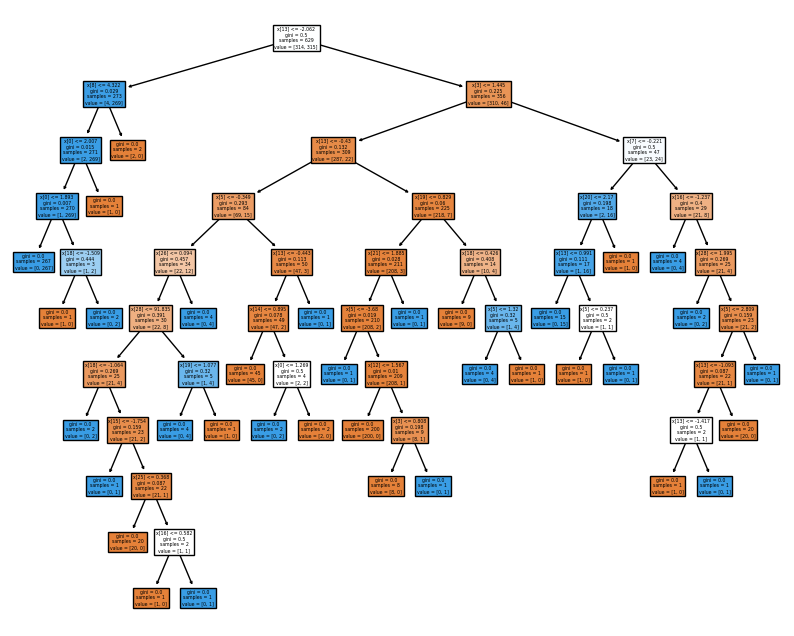

In [54]:
print(classification_report(Y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True)
plt.show()

### Coletando um conjunto de alphas a partir de uma amostra

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

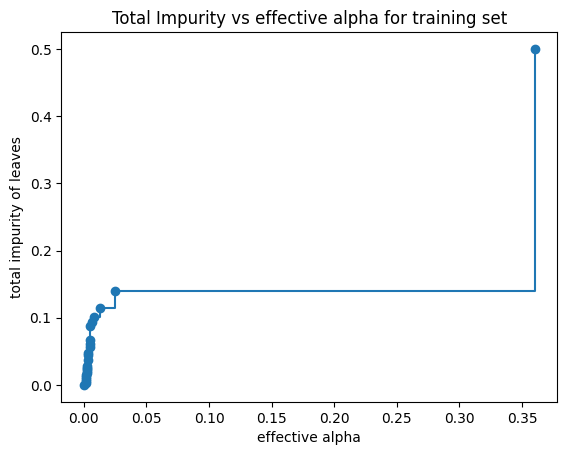

In [55]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

--> Best score: 0.905063
--> Best alpha: 0.025049


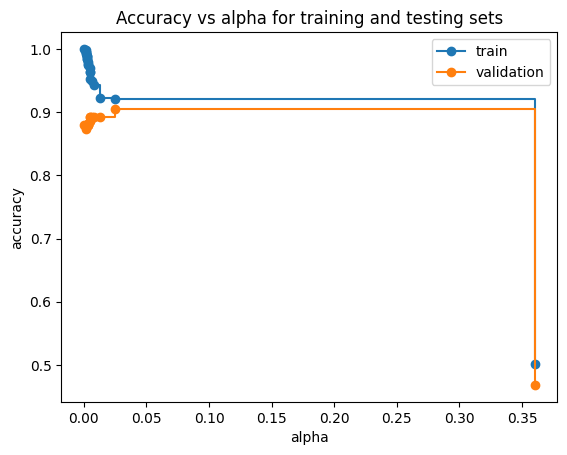

In [56]:
# Loop para treinar uma árvore de decisão para cada valor de ccp_alpha
trees = []
for alpha in ccp_alphas:
    # Criação do classificador de árvore de decisão com o valor de ccp_alpha atual
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=alpha)
    
    # Treinamento do classificador com os dados de treinamento
    clf.fit(X_train, Y_train)
    
    # Adiciona a árvore treinada à lista de árvores
    trees.append(clf)

train_scores = [clf.score(X_train, Y_train) for clf in trees]
val_scores = []

best_score = 0
best_alpha = 1

for i in range(len(trees)):
    score = trees[i].score(X_val, Y_val)
    val_scores.append(score)
    if score > best_score:
        best_score = score
        best_alpha = ccp_alphas[i]



print(f'--> Best score: {best_score:.6f}')
print(f'--> Best alpha: {best_alpha:.6f}')

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

Ein: 0.0795
Eout: 0.1015
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        94
           1       0.94      0.86      0.90       103

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



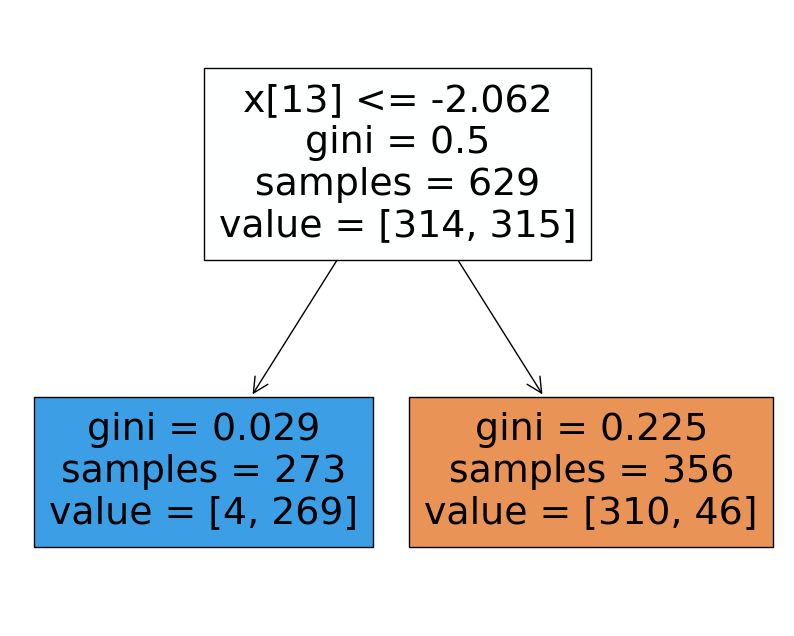

In [57]:
# Create the decision tree model
model = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=best_alpha)

# Fit the model to the training data
clf = model.fit(X_train, Y_train)

print('Ein: %0.4f' % (1 - accuracy_score(Y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(Y_test, clf.predict(X_test))))
print(classification_report(Y_test, clf.predict(X_test)))
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True)
plt.show()

### Eliminando o Overfitting usando Kfold e alphas de cada fold para obter a melhor Arvore de decisão

Average Accuracy: 0.8907994871370668
Ein: 0.0313
Eout: 0.0000
best_acc: 1.0000
best_alpha: 0.3601018468
best_R_alpha: 0.1590
best_num_nodes: 23.0000


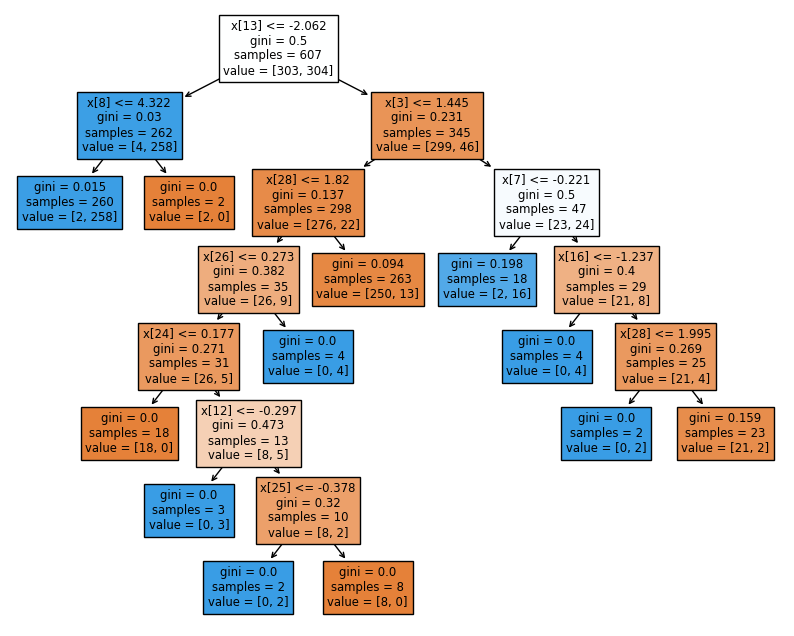

In [58]:
RANDOM_STATE = 6
best_acc = 0

# Garante que cada fold esteja balanceado
skf = StratifiedKFold(n_splits=29, shuffle=True, random_state=RANDOM_STATE)

# Inicializa a lista de armazenar os acurácias de cada fold
accuracies = []

# Executa a validação para cada fold
for train_index, test_index in skf.split(X_train, Y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = Y_train[train_index], Y_train[test_index]

    # Calcula o caminho de custo-complexidade para cada fold e armazena os valores de ccp_alpha
    path = clf.cost_complexity_pruning_path(X_train_fold, y_train_fold)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    for i in range(len(ccp_alphas)):
        # Cria a arquitetura da arvore
        model = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=ccp_alphas[i])

        # Treina o modelo
        clf = model.fit(X_train_fold, y_train_fold)

        num_nodes = clf.tree_.node_count
        R_alpha = (num_nodes * ccp_alphas[i]) + impurities[i]

        # Avalia o modelo
        accuracy = accuracy_score(y_test_fold, clf.predict(X_test_fold))
        accuracies.append(accuracy)
        
        # Salva o melhor modelo
        if accuracy > best_acc:
            best_acc = accuracy
            best_model = clf
            best_alpha = alpha
            Ein = 1 - accuracy_score(y_train_fold, clf.predict(X_train_fold))
            Eout = 1 - accuracy
            best_R_alpha = R_alpha
            best_num_nodes = num_nodes


# Calcula a acurácia média
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)

print('Ein: %0.4f' % Ein)
print('Eout: %0.4f' % Eout)
print('best_acc: %0.4f' % best_acc)
print('best_alpha: %0.10f' % best_alpha)
print('best_R_alpha: %0.4f' % best_R_alpha)
print('best_num_nodes: %0.4f' % best_num_nodes)
plt.figure(figsize=(10, 8))
plot_tree(best_model, filled=True)
plt.show()

# Utilizando o modelo no teste

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.52      1.00      0.69       103

    accuracy                           0.52       197
   macro avg       0.26      0.50      0.34       197
weighted avg       0.27      0.52      0.36       197



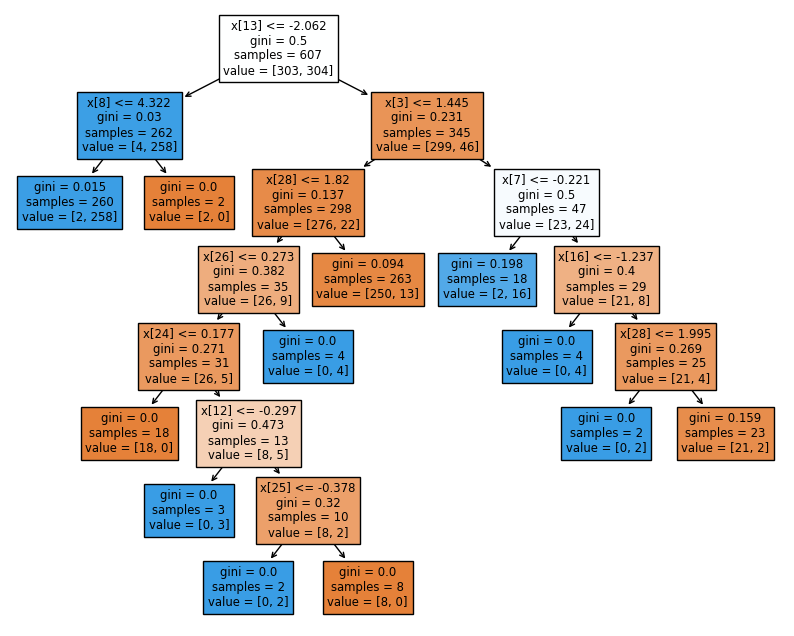

In [59]:
print(classification_report(Y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 8))
plot_tree(best_model, filled=True)
plt.show()